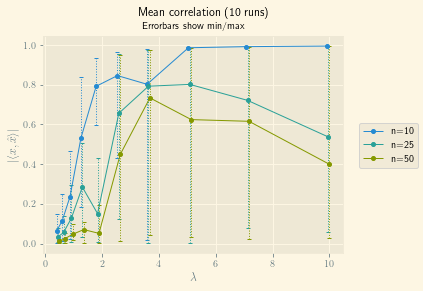

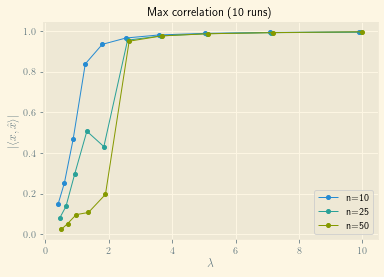

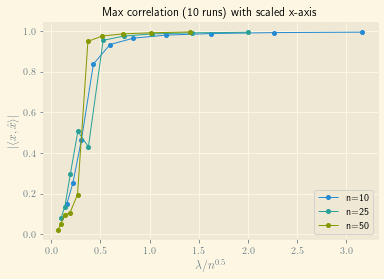

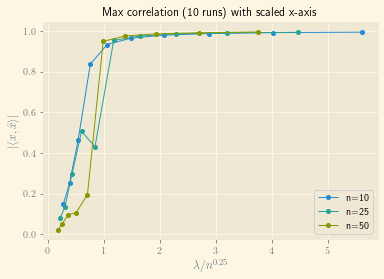

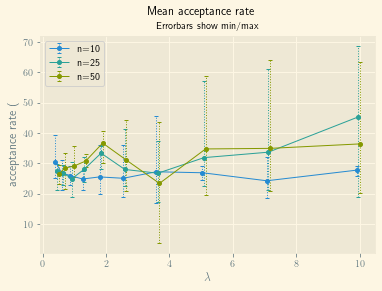

In [4]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os

# Loading the data
run = "corr__06-05-2022_15:05"
filename = f"./data/{run}.pkl"
infile = open(filename, "rb")
results = pickle.load(infile)
infile.close()

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

correlations = np.abs(np.array([l["correlations"] for l in results]))
acceptance_rates = np.array([l["acceptance_rates"] for l in results])

dims = list(set([l["dim"] for l in results]))
dims.sort()

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()


labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]

with plt.style.context("Solarize_Light2"):
    plt.rc('text', usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(len(dims)):
        means = np.abs(correlations).mean(axis=1)[i * 10 : (i + 1) * 10]
        mins = np.abs(correlations).min(axis=1)[i * 10 : (i + 1) * 10]
        maxs = np.abs(correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.show
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(len(dims)):
        maxs = np.abs(correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")

    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.plot(
            lambdas / dim**0.5,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.5}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")

    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.5.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.plot(
            lambdas / dim**0.25,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.25}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")

    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.25.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(len(dims)):
        means = 100 * acceptance_rates.mean(axis=1)[i * 10 : (i + 1) * 10]
        mins = 100 * acceptance_rates.min(axis=1)[i * 10 : (i + 1) * 10]
        maxs = 100 * acceptance_rates.max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (%)")

    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)


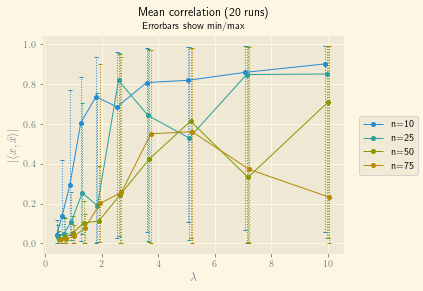

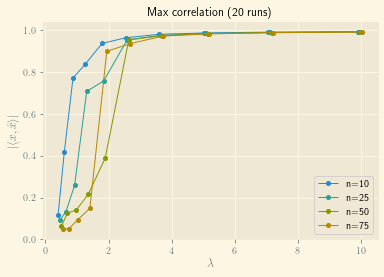

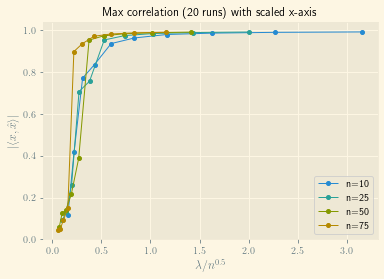

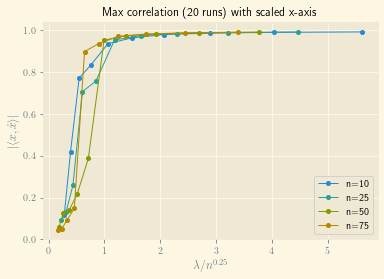

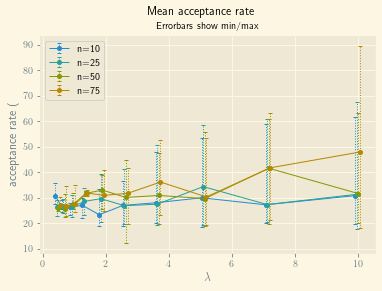

In [5]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle

# Loading the data
run = "corr__07-05-2022_21:34"
filename = f"./data/{run}.pkl"
infile = open(filename, "rb")
results = pickle.load(infile)
infile.close()

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

correlations = np.abs(np.array([l["correlations"] for l in results]))
final_correlations = np.array(
    [correlation_list[:, -2] for correlation_list in correlations]
)
acceptance_rates = np.array([l["acceptance_rates"] for l in results])

dims = list(set([l["dim"] for l in results]))
dims.sort()

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]


# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc('text', usetex=True)
    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(len(dims)):
        means = np.abs(final_correlations).mean(axis=1)[i * 10 : (i + 1) * 10]
        mins = np.abs(final_correlations).min(axis=1)[i * 10 : (i + 1) * 10]
        maxs = np.abs(final_correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.show
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(len(dims)):
        maxs = np.abs(final_correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.legend
    plt.show
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.plot(
            lambdas / dim**0.5,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.5}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.5.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.plot(
            lambdas / dim**0.25,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.25}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/correlations_scaledaxis_0.25.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(len(dims)):
        means = 100 * acceptance_rates.mean(axis=1)[i * 10 : (i + 1) * 10]
        mins = 100 * acceptance_rates.min(axis=1)[i * 10 : (i + 1) * 10]
        maxs = 100 * acceptance_rates.max(axis=1)[i * 10 : (i + 1) * 10]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (%)")

    plt.legend()
    plt.show
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)
